# Unidad 1: Introducción al Aprendizaje Automático

In [2]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


En este problema se tiene un conjunto de datos bidimensionales que representan dos categorías `r` y `g` y un nuevo conjunto de datos en el que no se conoce la categoría.

In [4]:
data = np.array([[1, 1], [1.5, 0.95], [1.5, 1.75], [1.9, 2], [2.2, 1.8], [2.5, 2.2]])
target =  np.array(['r', 'r', 'r', 'g', 'g', 'g'])

newData = np.array([[0.8, 1.5], [2.3, 2.8], [2, 2]])

El problema es encontrar las categorías a las que pertenecen los nuevos puntos, en la gráfica los de color negro.

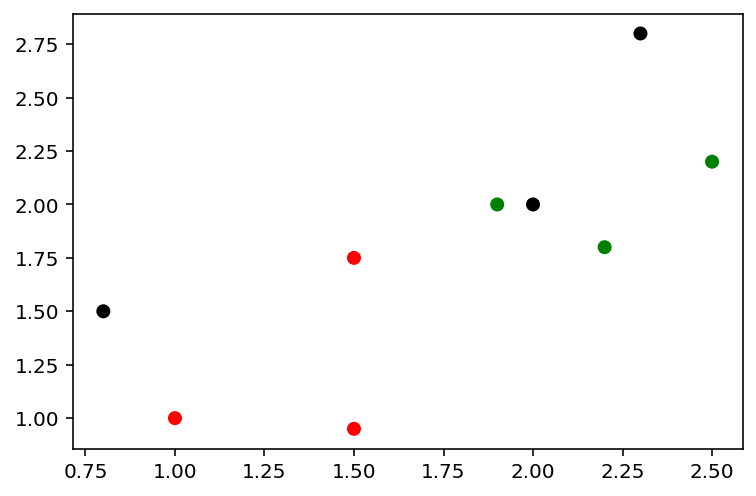

In [9]:
X = np.vstack([data, newData])
col = np.concatenate([target, np.array(['k', 'k', 'k'])])

scatter(X[:, 0], X[:, 1], color = col)

Para esto se puede utilizar el clasificador `RadiusNeighborsClassifier`

In [10]:
from sklearn.neighbors import RadiusNeighborsClassifier

# Creamos el modelo sin entrenar:
model = RadiusNeighborsClassifier(radius = 1)

# Entrenamos el modelo:
model.fit(data, target)

# Predecimos la clase para tres puntos diferentes:
prediction = model.predict(newData)

print(prediction)

['r' 'g' 'g']


Se puede representar los valores y comprobar que las categorías se han asignado correctamente.

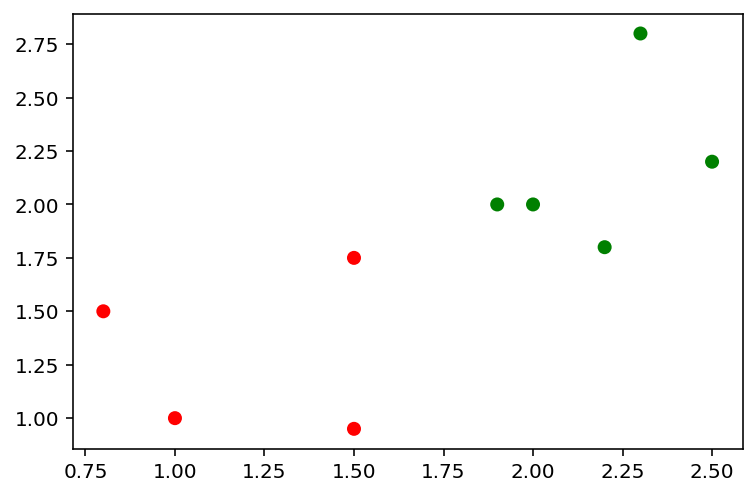

In [11]:
col = np.concatenate([target, prediction])
scatter(X[:, 0], X[:, 1], color = col)

# KNeighborsClassifier
El ejmeplo anterior se puede repetir utlizando el clasificador `KNeighborsClassifier` y comprobar la predicción que ofrece este.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Creamos el modelo sin entrenar:
model = KNeighborsClassifier(n_neighbors = 3)

# Entrenamos el modelo:
model.fit(data, target)

# Predecimos la clase para tres puntos diferentes:
prediction = model.predict(newData)

print(prediction)

['r' 'g' 'g']


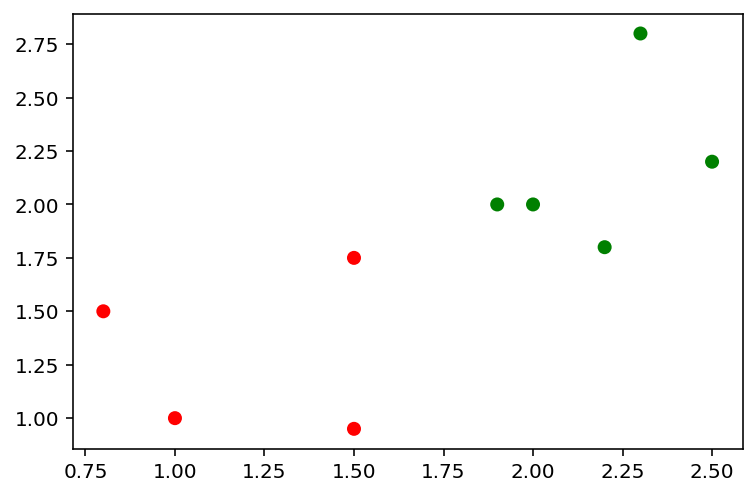

In [13]:
col = np.concatenate([target, prediction])
scatter(X[:, 0], X[:, 1], color = col)

# Ejemplo con datos de iris

In [14]:
from sklearn.datasets import load_iris

iris = load_iris()

# Para facilitar solamente se utilizan las dos primeras celdas
X = iris.data[:, 0:2]
y = iris.target

knn = KNeighborsClassifier(5)
knn.fit(X, y)

KNeighborsClassifier()

(1.0, 5.350000000000004)

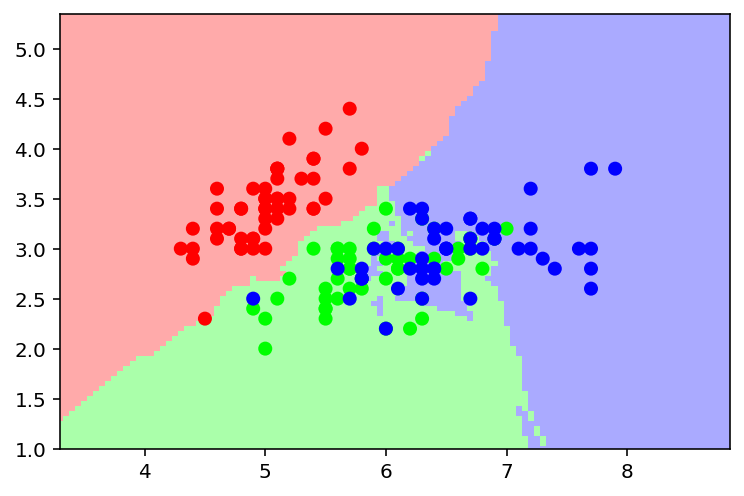

In [15]:
from matplotlib.colors import ListedColormap

# Version clara y oscura de los coloes
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Creación de un conjunto de datos para 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

pcolormesh(xx, yy, Z, cmap = cmap_light)
scatter(X[:, 0], X[:, 1], c=y, cmap = cmap_bold)
xlim(xx.min(), xx.max())
ylim(yy.min(), yy.max())

(1.0, 5.350000000000004)

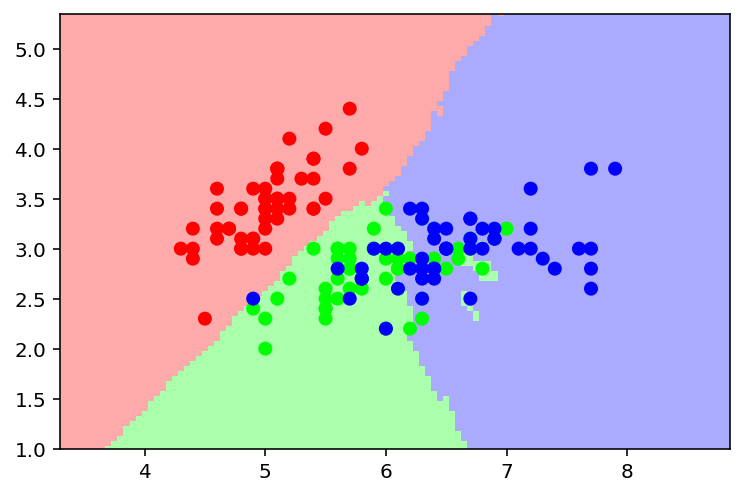

In [16]:
knn = KNeighborsClassifier(15)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

pcolormesh(xx, yy, Z, cmap = cmap_light)
scatter(X[:, 0], X[:, 1], c=y, cmap = cmap_bold)
xlim(xx.min(), xx.max())
ylim(yy.min(), yy.max())